# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 1**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
threshold_g = 220
threshold_rb = 150

In [3]:
base_path = "../Images/{}"

## Util Functions

In [4]:
def read_image(path, cvtcolor="RGB"):
    if cvtcolor == "RGB":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [5]:
def inRange_rgb(arr):
    return np.where((arr[:,:,1] > threshold_g) & (arr[:,:,0] < threshold_rb) & (arr[:,:,2] < threshold_rb), 255, 0)

In [6]:
def mask_image(image, negative=False):
    image1 = np.copy(image)
    mask = inRange_rgb(image1)
    if negative:
        image1[mask == 0] = [0, 0, 0]
    else:
        image1[mask != 0] = [0, 0, 0]
    return image1

## Main Code

In [7]:
fg = read_image('oppenheimer.png')
bg = read_image('atomicbomb.jpg')

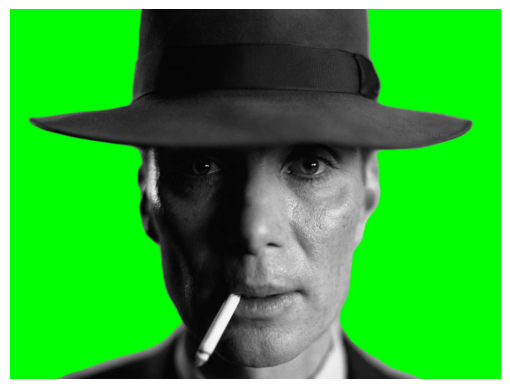

In [8]:
show_image(fg)

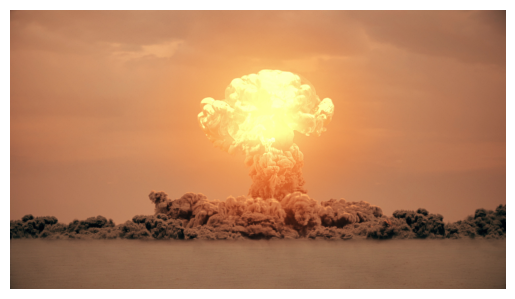

In [9]:
show_image(bg)

In [10]:
masked_fg = mask_image(fg)
masked_bg = mask_image(bg, negative=True)

new_image = masked_fg + masked_bg

show_image(new_image)

ValueError: operands could not be broadcast together with shapes (595,790,3) (2160,3840,3) 